# **Guía 1**

In [2]:
from sympy import *
from sympy import I as i
init_printing(use_unicode=True)
from typing import List, Dict
import numpy as np


## **General**

### **Producto Vectorial**

In [3]:
def vectorial_product(A,B):
  a = Matrix([[A[1], A[2]], [B[1], B[2]]]).det()
  b = Matrix([[A[0], A[2]], [B[0], B[2]]]).det()
  c = Matrix([[A[0], A[1]], [B[0], B[1]]]).det()
  return Matrix([a, -b, c])

### **Matrices**

In [52]:
'''
  A.inv                                   -> La inversa de A
  A.T                                     -> La transpuesta de A
  A.transpose()                           -> La transpuesta de A
  A.det                                   -> Determinante de A
  A.normalized()                          -> Matriz normalizada
  A.rref()                                -> Matriz triangulada
  A[1,0]                                  -> Posicion segunda fila primera columna
  A[:,0]                                  -> La primera columna de A
  A[0,:]                                  -> La primera fila de A
  A.col(0)                                -> La primera columna de A
  A.subs(t, pi/3)                         -> Reemplaza las t por pi/3
  A.subs({x1:1, x2:5, x3:7})               -> Reemplaza x1 por 1, x2 por 5...
  Z = zeros(2,1)                          -> Matriz de 0s de 2 filas 1 columna
  eye(n)                                  -> Matriz identidad en n x n
  Matrix.hstack(v1,v2)                    -> Matriz con columnas v1, v2
  Matrix.vstack(v1,v2)                    -> Matriz con filas v1, v2
  Lambda = diag(2, 2, 3)                  -> Matriz diagonal
  x, parametro = B.gauss_jordan_solve(v)  -> Solucion de B.x = v
  simplify(A)                             -> Simplifica A
  expand(A)                               -> Expande A
  n, m = A.shape                          -> Cantidad filas y columnas de A
'''

'''
  Escritura de matriz, ejemplos:

  U = Rational('1/3') * Matrix([[ 2, 2, 1],
                                [-2, 1, 2],
                                [ 1,-2, 2]])
  
  ___________________________________________

  t = Symbol('t')
  A = Matrix([[ cos(t), -sin(t)],
              [ sin(t), cos(t)]])
  A.subs(t, pi/3)

'''


"\n  Escritura de matriz, ejemplos:\n\n  U = Rational('1/3') * Matrix([[ 2, 2, 1],\n                                [-2, 1, 2],\n                                [ 1,-2, 2]])\n  \n  ___________________________________________\n\n  t = Symbol('t')\n  A = Matrix([[ cos(t), -sin(t)],\n              [ sin(t), cos(t)]])\n  A.subs(t, pi/3)\n\n"

### **Polinomios**

In [5]:
'''
  diff(p,x) -> La derivada de p respecto de x
  p.subs(x,1) -> p(1)
  p.factor() -> factoriza un polinomio
  p.roots() -> las raices del polinomio
  P = plot(p,(x,0,2)) -> grafico del polinomio con x entre 0 y 2
  P = plot(*L, (x,0,2)) -> grafico de una lista de polinomios con x entre 0 y 2
  P[0].line_color = 'red' -> color del primer polimonio
  P.show() -> muestra el grafico del polinomio con x entre 0 y 10
'''

'''
  Escritura de polimomio, ejemplos:

  x, a0, a1, a2 = symbols('x, a0, a1, a2')
  p = a0 + a1*x + a2*x**2
'''

"\n  Escritura de polimomio, ejemplos:\n\n  x, a0, a1, a2 = symbols('x, a0, a1, a2')\n  p = a0 + a1*x + a2*x**2\n"

### **Combinación Lineal**

In [6]:
def gauss_jordan_con_generadores(A: Matrix, z: Matrix): #devuelve la solucion de gauss jordan entera, la sol part y sus generadores
  x, p = A.gauss_jordan_solve(z) 
  
  #hallo sol particular
  x_0 = x
  for i in range(len(p)):  
    x_0 = x_0.subs({p[i]:0}) 
  
  #hallo generadores
  generadores = []
  for i in range(len(p)):
    x_i = x - x_0
    for j in range(len(p)):
      if j != i:
        x_i = x_i.subs({p[j]:0})
    x_i = x_i.subs({p[i]:1})
    generadores.append(x_i)
    
  return x, x_0, generadores

### **Independencia Lineal**

In [7]:
def encontrar_vector_li_a_conjunto(A: List[Matrix]):  #Principio de sustitución de Steinez
  cant_filas, _ = A[0].shape
  A_ld = Matrix.hstack(*A, eye(cant_filas,cant_filas))
  A_li = obtener_vectores_li(A_ld)
  return A_li

#_______________________

def obtener_vectores_li(A: Matrix):
  E_A, pivotes_A = A.rref()
  A_li = []
  for pivote in pivotes_A:
      A_li.append(A.col(pivote))        #De la matriz original
  return A_li

#_______________________

'''
  Ejemplo:
  B = [Matrix([a, 1, 2]), Matrix([3, 2, 3]), Matrix([1, -a, 1])] #una lista
  encontrar_a(B, a)
'''
a = Symbol('a')
def encontrar_a(B: List[Matrix], a: Symbol): #Halla el o los valores que puede tener a para que los vectores sean linealmente independientes: formen una base

    return solve(det(Matrix.hstack(*B)), a)

### **Subespacios**

*   $rango(A)$ $:=$ cantidad de pivotes de $E_A$.
*   $rango(A)$ $:=$ cantidad de filas no nulas de $E_A$.
*   $rango(A)$ $:=$ cantidad de columnas basicas de $A$.

*   $rango(A)$ = $dim(col(A))$ = $dim(fil(A))$.

*   $dim(nul(A))$ = $n$ − $rango(A)$ = $n$ − $dim(col(A))$

  Siendo $n$ = cantidad de columnas de $A$ 

*   $dim(nul(A^T))$ = $m$ − $dim(col(A^T))$ = $m$ − $dim (fil(A))$.

  Siendo $m$ = cantidad de filas de $A$ 

*   yapa: $dim(\mathbb{S})$ = $dim(\mathbb{V})$ - número ecuaciones.


$Bx=v$ tiene solución si y solamente si $v ∈ col(B)$

*   $Bx=v$ tiene solución única $<=>$ las columnas de A forman un conjunto LI $<=>$ $Nul(A)$ = 0 
 
  Si tiene solución única, puedo hacer x = $B^{-1}.v$
*   $Bx=v$ tiene $\infty$ soluciones $<=>$ las columnas de A forman un conjunto LD $<=>$ $Nul(A)$ $\neq$ 0 



In [8]:
'''  
  A.nullspace() -> devuelve el espacio nulo de A 
  A.columnspace() -> devuelve el espacio columna de A
  A.T.columnspace() -> devuelve el espacio columna de A traspuesta
  A.T.nullspace() -> devuelve el espacio nulo de A traspuesta
  n, m = A.shape -> cantidad de filas y columnas de la matriz
'''

def algoritmo_espacio_columna(S: List[Matrix]): #Encuentra el espacio columna de un subespacio
    B_S = Matrix.hstack(*S)
    E_S, pivotes_S = B_S.rref()
    S_li = []
    for pivote in pivotes_S:
        S_li.append(S[pivote])        #De la matriz original
    return S_li, pivotes_S #devuelve la matriz con los vectores que generan el espacio columna y los índices de los pivotes.    


'''
    Verifica si dos subespacios son el mismo subespacio devolviendo True para ese 
    caso y False en caso contrario.
    
    Ejemplo:
    S1 = [Matrix([-4, -5, -3]), Matrix([26, 41, 23])]
    bien = [Matrix([11, 18, 10]), Matrix([15, 23, 13])]
    mal_1 = [Matrix([-3, 10, 8]), Matrix([-6, 11, 10])]
    mal_2 = [Matrix([7, 12, 2]), Matrix([9, 14, 1])]
    mal_3 = [Matrix([7, 2, 12]), Matrix([9, 1, 14]), 2 * Matrix([9, 1, 14])]

    dos_subespacios_generan_el_mismo_subespacio(S1, bien), dos_subespacios_generan_el_mismo_subespacio(S1, mal_1), dos_subespacios_generan_el_mismo_subespacio(S1, mal_2), dos_subespacios_generan_el_mismo_subespacio(S1, mal_3)
'''
def dos_subespacios_generan_el_mismo_subespacio(S1: List[Matrix], S2: List[Matrix]):
    
    S1_li, pivotes_S1 = algoritmo_espacio_columna(S1)
    S2_li, pivotes_S2 = algoritmo_espacio_columna(S2)
    
    B_S1_li = Matrix.hstack(*S1_li)
    B_S2_li = Matrix.hstack(*S2_li)
    
    B = Matrix.hstack(B_S1_li, B_S2_li)
    _, pivotes_B = B.rref()
    
    return len(pivotes_B) == len(pivotes_S1) and len(pivotes_B) == len(pivotes_S2)
    

## **Específico**

###**Transformaciones Lineales**

*Se dice que T es una transformacion lineal de $\mathbb{V}$ en $\mathbb{W}$ cuando satisface las siguiente propiedades:*

1.   *Aditividad: $T(v_1 + v_2) = T(v_1) + T(v_2)$ para todo $v_1, v_2 \in \mathbb{V}$.*
2.   *Homogeneidad: $T(a.v) = a.T(v)$ para todo $v \in \mathbb{V}$, $a \in \mathbb{K}$.*

Entonces, se cumple que:
$$T(0_{\mathbb V}) = 0_{\mathbb W}$$
___________________
Sea $T$ : $\mathbb{K}^{n} \rightarrow \mathbb{K}^{m}$ una transformación lineal y $\mathbb{B}$ = $\left\{ v_1, ..., v_n\right\}$ una base de $\mathbb{K}^{n}$. La matriz $A_T$ $\in$ $\mathbb{K}^{m \times n}$ es la matriz de la transformación lineal si:

$$A_T = (T(v_1)...T(v_n))$$

siendo que

$$T(\begin{bmatrix}x_1\\...\\x_n\end{bmatrix}) = A_T\begin{bmatrix}x_1\\...\\x_n\end{bmatrix}$$

In [9]:
#Parametros: T una t.l, B una base    
#Devuelve la matriz de la transformacion lineal T a partir de T y una base
def matriz_tl_con_tl_y_base(T: Matrix, B: List[Matrix]): #la matriz de T a partir de B
  TB = Matrix() 
  for i in B:
    ti = T*i
    TB = Matrix.hstack(TB, ti)
  return TB


#Parametros: B una base, W  los transformados de B    
#Devuelve la matriz de la transformacion lineal T a partir de una base, y los transformados de la base    
def matriz_tl_con_base_y_transformados(B: List[Matrix], W: List[Matrix]): #la matriz de T a partir de los transformados de B
    return Matrix.hstack(*W) * Matrix.hstack(*B).inv()

#Parametros: T una t.l, p una lista de polinomios
#Devuelve T(polinomios)
def transformacion_lineal_pol(T: Matrix, polinomios):
  polinomios = [Matrix([i]) for i in polinomios]
  P = Matrix.vstack(*polinomios)
  return (expand(T*P))[0,0] #devuelvo el elemento que está en formato Matriz

### **Monomorfismo, epimorfismo e isomorfismo**

*   $T$ es inyectiva $\Leftrightarrow$ $T$ es monomorfismo.

  $T(x) = T(y) \Rightarrow x = y \quad\quad$ "cosas distintas a lugares distintos" 

*   $T$ es sobreyectiva $\Leftrightarrow$ $T$ es epimorfismo.

  $y = T(x) \quad \forall y \in \mathbb{W} \quad\quad\quad$ "ningún elemento del codominio está libre" 

*   $T$ es biyectiva $\Leftrightarrow$ $T$ es isomorfismo.

  Si $T$ es inyectiva y sobreyectiva $\Leftrightarrow$ Si $T$ es monomorfismo y epimorfismo

______________


*   $dim(Nu(T)) + dim(Im(T)) = dim(\mathbb{V})$

*   $T$ es monomorfismo $\quad\Leftrightarrow\quad$ $Nu(T) = \left\{ 0_{\mathbb W}\right\}$

*   $T$ es epimorfismo $\quad\quad\Leftrightarrow\quad$ $Im(T) = \mathbb W$ $\quad\quad\Leftrightarrow\quad$ $dim(Im(T)) = dim(\mathbb W)$

*   $T$ es monomorfismo $\Rightarrow$ $dim(\mathbb V) \leq dim(\mathbb W)$

*   $T$ es epimorfismo $\quad\Rightarrow$ $dim(\mathbb V) \geq dim(\mathbb W)$

*   $T$ es isomorfismo $\quad\Rightarrow$ $dim(\mathbb V) = dim(\mathbb W)$

______________

**Solución de $T(v) = w$**

*    Si $w \notin Im(T) \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \Rightarrow \quad$ Sistema Incompatible
*    Si $w \in Im(T)$ y $T$ es un monomorfismo $\quad \quad \Rightarrow \quad$ Sistema Compatible Determinado
*    Si $w \in Im(T)$ y $T$ no es un monomorfismo $\quad \Rightarrow \quad$ Sistema Compatible Indeterminado

In [62]:
def clasificacion(At: Matrix):
  imT = At.columnspace()
  nuT = At.nullspace()

  dimW, dimV = At.shape
  if len(nuT) == 0 & len(imT) == dimW:
    return 'T es un isomorfismo'
  else:
    if len(nuT) == 0:
      return 'T es un monomorfismo'
    elif len(imT) == dimW:
      return 'T es un epimorfismo'
  
  return 'T no es un monomorfismo ni un epimorfismo'

### **Imagen y Preimagen**

Sean $v \in \mathbb{V}$ y $w \in \mathbb{W}$. Si $T(v) = w$ se dice que $w$ es la *imagen* de $v$ por $T$. Entonces, la imagen de la transformación lineal es

$$
\begin{aligned}
  Im(T) &= T(\mathbb{K}^{n}) = T (\begin{bmatrix}x_1\\...\\x_n\end{bmatrix}) = A_T\begin{bmatrix}x_1\\...\\x_n\end{bmatrix} = \begin{bmatrix}A_{T_1} & ... & A_{T_n}\end{bmatrix}\begin{bmatrix}x_1\\...\\x_n\end{bmatrix} =\\
        &= x_1 A_{T_1} + ... + x_n A_{T_n} = gen \left\{ A_{T_1}, ..., A_{T_n}\right\} = col(A_T) 
\end{aligned}
$$

Es decir, 
$$Im(T) = col(A_T) \quad\Rightarrow\quad B_{Im(T)} = B_{col(A_T)}$$
$$dim(Im(T)) = rango(A_T)$$
________________________

El conjunto de todas las imágenes inversas de $w$ por $T$ se denomina la *preimagen* de $w$ en $\mathbb V$ y se designa con $T^{−1}(w)$

$$T^{−1}(w) := \left\{v ∈ \mathbb V : T(v) = w \right\}$$

La preimagen se puede escribir como

$$T^{−1}(w) := v_p + Nu(T)$$

Siendo $T(v) = w$

\begin{align}
T(T^{−1}(w)) = w & & T^{−1}(T(v)) = v 
\end{align}


Para obtener la preimagen de un subespacio $U$ por $T$ se puede proceder de dos maneras (yo entiendo una sola, así que escribo solo esa)

$\rightarrow$ *Me dan $U$ con ecuaciones, formando esta la matriz $A_U$.



**Forma 1**: con $A_T$

Se sabe que:
* $T(x) = A_Tx$
* $T(x) = y$, siendo $y \in U$

Es decir,
$$
  T(x) = A_Tx
  \quad \Leftrightarrow \quad
  \begin{bmatrix}y_1\\y_2\\y_3\end{bmatrix} = A_T \begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix}
$$

Además

$$
  \left\{ \begin{array}{lcc}
              a_1.y_1 + b_1.y_2 + c_1.y_3 = 0 \\
              a_2.y_1 + b_2.y_2 + c_2.y_3 = 0 \\
              a_3.y_1 + b_3.y_2 + c_3.y_3 = 0
          \end{array}
  \right.
  \quad \rightarrow \quad
  \underbrace{\begin{bmatrix}a_1.y_1 + b_1.y_2 + c_1.y_3\\a_2.y_1 + b_2.y_2 + c_2.y_3\\a_3.y_1 + b_3.y_2 + c_3.y_3\end{bmatrix}}_{Ecuaciones \space de \space U} =\begin{bmatrix}0\\0\\0\end{bmatrix}
  \quad \Leftrightarrow \quad
  \underbrace{\begin{bmatrix}a_1&b_1&c_1\\a_2&b_2&c_2\\a_3&b_3&c_3\end{bmatrix}}_{A_U} \begin{bmatrix}y_1\\y_2\\y_3\end{bmatrix} =\begin{bmatrix}0\\0\\0\end{bmatrix}
  \quad \Leftrightarrow \quad
  A_U \begin{bmatrix}y_1\\y_2\\y_3\end{bmatrix} =\begin{bmatrix}0\\0\\0\end{bmatrix}
$$

Se junta la información:
$$
  A_U \begin{bmatrix}y_1\\y_2\\y_3\end{bmatrix} =\begin{bmatrix}0\\0\\0\end{bmatrix}
  \quad \Leftrightarrow \quad
  A_U A_T \begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix} =\begin{bmatrix}0\\0\\0\end{bmatrix}
$$

Finalmente,

$$
T^{-1}(y) = Nul(A_UA_T)
$$

**Forma 2**: con $\mathcal B$ y $\mathcal W$ 

Se sabe que:
* $T(x) = y$, siendo $y \in U$

Es decir que

$$
  T\left(\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix}\right) = \begin{bmatrix}y_1\\y_2\\y_3\end{bmatrix}
$$



Además se sabe que:
* $\mathcal B = \{ v_1 , v_2, v_3\}$ es una base.

* $T(\mathcal B) = \mathcal W$, siendo $\mathcal W = \{ w_1 , w_2, w_3\}$

Es decir,

\begin{align}
  T(v_1) = w_1,
  &&
  T(v_2) = w_2,
  &&
  T(v_3) = w_3
\end{align}

Como $\mathcal B$ es una base, se puede asegurar que cualquier $x$ se puede escribir como combinación lineal de los elementos de $\mathcal B$: 


$$
  \begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix} = \alpha v_1 + \beta v_2 + \gamma v_3 = \underbrace{\begin{bmatrix}v_1&v_2&v_3\end{bmatrix}}_{A_{\mathcal B}} \begin{bmatrix}\alpha\\\beta\\\gamma\end{bmatrix} =
  A_{\mathcal B} \begin{bmatrix}\alpha\\\beta\\\gamma\end{bmatrix}
$$

Por definición de la transformación lineal:

\begin{aligned}
  \begin{bmatrix}y_1\\y_2\\y_3\end{bmatrix} = T\left(\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix}\right) &=
  T(\alpha v_1 + \beta v_2 + \gamma v_3) =
  T(\alpha v_1) + T(\beta v_2) + T(\gamma v_3) =\\
  &= \alpha T(v_1) + \beta T(v_2) + \gamma T(v_3) =
  \alpha w_1 + \beta w_2 + \gamma w_3 =\\
  &= \underbrace{\begin{bmatrix}w_1&w_2&w_3\end{bmatrix}}_{A_{\mathcal W}} \begin{bmatrix}\alpha\\\beta\\\gamma\end{bmatrix} =
  A_{\mathcal W} \begin{bmatrix}\alpha\\\beta\\\gamma\end{bmatrix}
\end{aligned}

\\
Por ultimo, se sabe que cualquier transformado por T debe cumplir con:


$
  \left\{ \begin{array}{lcc}
              a_1.y_1 + b_1.y_2 + c_1.y_3 = 0 \\
              a_2.y_1 + b_2.y_2 + c_2.y_3 = 0 \\
              a_3.y_1 + b_3.y_2 + c_3.y_3 = 0
          \end{array}
  \right.\\
$


$$ \rightarrow \quad
  \underbrace{\begin{bmatrix}a_1.y_1 + b_1.y_2 + c_1.y_3\\a_2.y_1 + b_2.y_2 + c_2.y_3\\a_3.y_1 + b_3.y_2 + c_3.y_3\end{bmatrix}}_{Ecuaciones \space de \space U} =\begin{bmatrix}0\\0\\0\end{bmatrix}
  \quad \Leftrightarrow \quad
  \underbrace{\begin{bmatrix}a_1&b_1&c_1\\a_2&b_2&c_2\\a_3&b_3&c_3\end{bmatrix}}_{A_U} \begin{bmatrix}y_1\\y_2\\y_3\end{bmatrix} =\begin{bmatrix}0\\0\\0\end{bmatrix}
  \quad \Leftrightarrow \quad
  A_U \begin{bmatrix}y_1\\y_2\\y_3\end{bmatrix} =\begin{bmatrix}0\\0\\0\end{bmatrix}
$$

Se junta la información:

* $
  T\left(\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix}\right) = \begin{bmatrix}y_1\\y_2\\y_3\end{bmatrix} \quad\quad con:
  \begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix} =
  A_{\mathcal B} \begin{bmatrix}\alpha\\\beta\\\gamma\end{bmatrix},
    \begin{bmatrix}y_1\\y_2\\y_3\end{bmatrix} = 
  A_{\mathcal W} \begin{bmatrix}\alpha\\\beta\\\gamma\end{bmatrix}
  $

* $A_U \begin{bmatrix}y_1\\y_2\\y_3\end{bmatrix} =\begin{bmatrix}0\\0\\0\end{bmatrix}
\Rightarrow
A_U A_{\mathcal W} \begin{bmatrix}\alpha\\\beta\\\gamma\end{bmatrix} =\begin{bmatrix}0\\0\\0\end{bmatrix}
\Rightarrow
Nul(A_U A_{\mathcal W}) = \begin{bmatrix}\alpha\\\beta\\\gamma\end{bmatrix}$


$
\Rightarrow
\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix} =
A_{\mathcal B} \begin{bmatrix}\alpha\\\beta\\\gamma\end{bmatrix} =
A_{\mathcal B} Nul(A_U A_{\mathcal W})
$

Finalmente,

$$
T^{-1}(y) = A_{\mathcal B} Nul(A_U A_{\mathcal W})
$$


In [10]:
'''
    Halla la imagen por T de un subespacio S dada una base B y la imágen por T de B
    
    B: es una lista de vectores que conforman la base B
    W: es una lista de vectores que corresponden a las imágenes de los vectores de la base B
    S: es una lista de vectores que generan el subespacio S
'''
def imagen_por_T_de_S_con_B_y_W(B: List[Matrix], W: List[Matrix], S: List[Matrix]): 
    # Obtengo la matriz de T
    A_T = matriz_tl_con_base_y_transformados(B, W)

    # Obtengo los transformados de S    
    imagen_T_S = A_T * Matrix.hstack(*S)

    # Armo una base con los transformados de S    
    base_T_S = obtener_vectores_li(imagen_T_S)
    
    return base_T_S
#_______________________________________________________________________________


#Forma 1, explicada arriba
def preimagen_subespacio_con_At(At: Matrix, Au: Matrix):
  
    return (Au*At).nullspace()
    
#_______________________________________________________________________________

#Forma 2, explicada arriba
def preimagen_subespacio_con_B_y_W(B: List[Matrix], W: List[Matrix], Au: Matrix):
    B_matrix = Matrix.hstack(*B)
    W_matrix = Matrix.hstack(*W)

    sol = (Au * W_matrix).nullspace()
    preimagen_U = B_matrix * Matrix.hstack(*sol)

    #Obtengo una base de la preimagen
    B_T_inv_U = obtener_vectores_li(preimagen_U)
    
    return B_T_inv_U


### **Nucleo**

El conjunto $Nu(T) ⊂ \mathbb V$ definido por $Nu(T) := \left\{v ∈ \mathbb V : T(v) = 0 \right\}$ se llama *núcleo* de $T$:

$$
\begin{aligned}
  Nu(T) &= T^{-1}(0) =
  \left\{ \begin{bmatrix}x_1\\\vdots\\x_n\end{bmatrix} :\quad T(\begin{bmatrix}x_1\\\vdots\\x_n\end{bmatrix}) = \begin{bmatrix}0\\\vdots\\0\end{bmatrix}\right\} =\\
        &= 
  \left\{ \begin{bmatrix}x_1\\\vdots\\x_n\end{bmatrix} :\quad A_T\begin{bmatrix}x_1\\\vdots\\x_n\end{bmatrix} = \begin{bmatrix}0\\\vdots\\0\end{bmatrix}\right\} = Nul(A_T)
\end{aligned}
$$

Es decir, 
$$Nu(T) = Nul(A_T)$$

### **Cápsula**

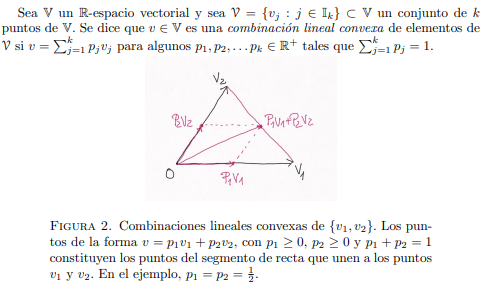

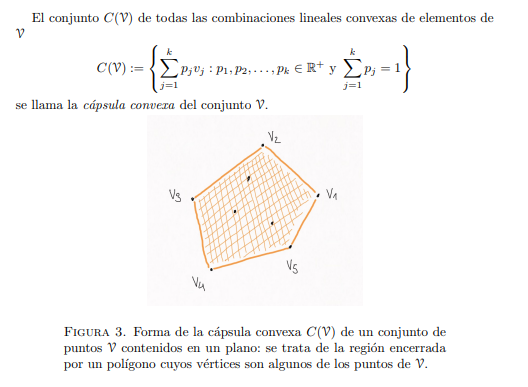

$$
T(\mathcal C(\mathcal V)) = \mathcal C(T(\mathcal V))
$$

###**Extensiones Lineales**

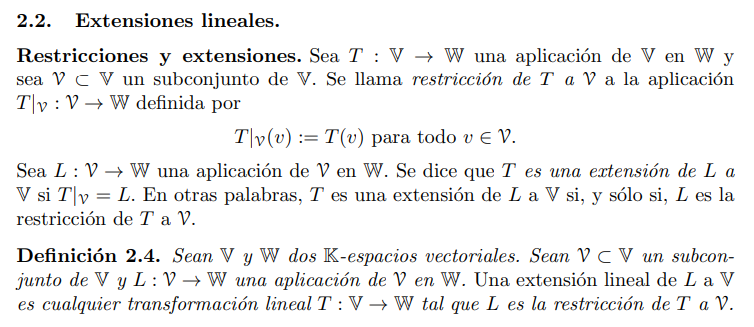

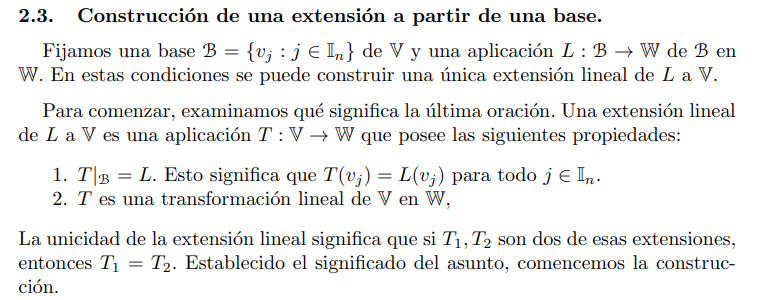

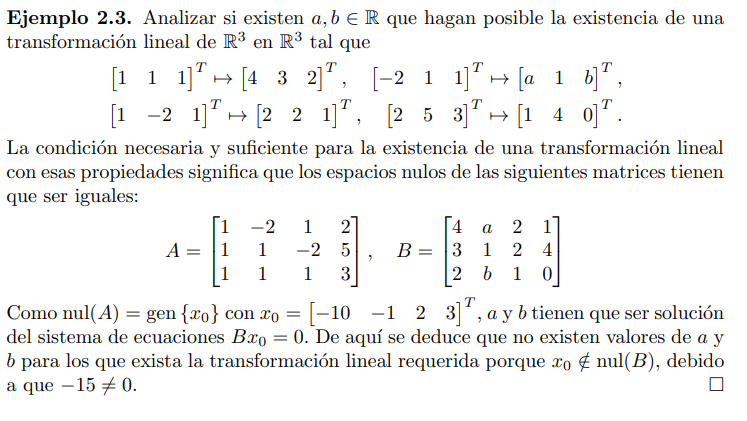

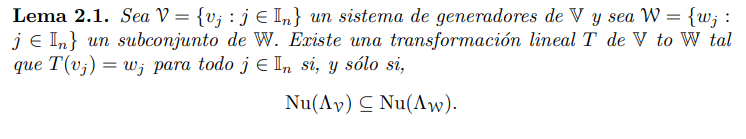

##Notas

##Funciones Ivan Litteri

In [11]:
# TODO: EN CONSTRUCCIÓN
def nucleo_de_operador_diferencial(L):
    '''
    '''
    x = Symbol('x')
    Nu_L = set()
    raices = str(L).split('*')
    for raiz in raices:
        try:
            l = -int(raiz[raiz.index('-')+1])
        except:
            l = int(raiz[raiz.index('+')+1])
        
        if '**' in raiz:   
            k = int(raiz.split('**')[1])
        else:
            k = 1
            
        for i in range(k):
            Nu_L.add((x**(i))*exp(-l*x))
    return Nu_L

def solucion_particular(Nu_L, Nu_A):
    Nu_AL = Nu_L | Nu_A
    yp_expr = ''
    for i, e in enumerate(Nu_AL - Nu_L):
        yp_expr += f'a{i+1}*{e}+'
    return yp_expr[:-1]

# D, I = symbols('D I')
# L = (D-2*I)*(D-4*I)*(D+3*I)**2

# Nu_L = nucleo_de_operador_diferencial(L)
# Nu_A = nucleo_de_operador_diferencial('(D+3I)^6')

# solucion_particular(Nu_L, Nu_A)

##**Ejercicios**

### **Ejercicios generales**

#### **1.** Sea $T: \mathbb{R}^3 \rightarrow \mathbb{R}^3$ la transformación lineal dada por $A_T =
\begin{bmatrix}
  1 &  1 & 1 \\
  1 & -1 & 0 \\
  0 &  2 & 1 \\
  \end{bmatrix}$.

##### 1.**a.** Calcular $T(\begin{bmatrix}4\\-1\\3\end{bmatrix})$. Dar una base de $Im(T)$. ¿Es epi?

In [63]:
#Calculo T(v) = A.v
A = Matrix([[1, 1,  1],
            [1, -1, 0],
            [0, 2, 1]])
v = Matrix([4,-1,3])
A*v 

#Calculo Im(T) = col(A)
imagen = A.columnspace() #la dimension de la imagen de Tes 2

#Es epi? 
#Dimension del espacio de llegada: dim(R^3) = 3
#Dimension de la imagen: dim(imagen) = 2
#Como no son iguales, T no es epi
clasificacion(A)

'T no es un monomorfismo ni un epimorfismo'

##### 1.**b.** Dar una base de $Nu(T)$. ¿Es mono?

In [64]:
A = Matrix([[1, 1,  1],
            [1, -1, 0],
            [0, 2, 1]])

nuT = A.nullspace() #la dimension del nucleo de T es 1

#Es mono?
#Como dimension del nucleo no es 0, entonces T no es mono
clasificacion(A)

#Verifico el teorema de la dimensión: dim(Im(T)) + dim(Nu(T)) = dim(V)
#                                         2      +     1      =   3


'T no es un monomorfismo ni un epimorfismo'

##### 1.**c.** Mostrar que $\begin{bmatrix}1\\0\\1\end{bmatrix} \in Im(T)$ y resolver $T(X) = \begin{bmatrix}1\\0\\1\end{bmatrix}$ 

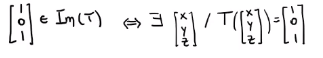

In [14]:
#T(x) = v
#A.x = v
A = Matrix([[1, 1,  1],
            [1, -1, 0],
            [0, 2, 1]])
v = Matrix([1,0,1])

x = A.gauss_jordan_solve(v)
x #veo que existen infinitos [x y z] tal que A.[x y z] = v    =>    v ∈ Im(T)


⎛⎡1   τ₀⎤      ⎞
⎜⎢─ - ──⎥      ⎟
⎜⎢2   2 ⎥      ⎟
⎜⎢      ⎥      ⎟
⎜⎢1   τ₀⎥, [τ₀]⎟
⎜⎢─ - ──⎥      ⎟
⎜⎢2   2 ⎥      ⎟
⎜⎢      ⎥      ⎟
⎝⎣  τ₀  ⎦      ⎠

#### **2.** Sea $T: \mathbb{R}_2[x] \rightarrow \mathbb{R}_2[x]$ dada por $T(p) =  2p + (1-x^2)p''$.

##### 2.**a** Calcular $T(3x^2 + x)$

In [15]:
x = Symbol('x')

T = Matrix([2, 1-x**2]).T #una transformacion de R2[x] a R2[x]

q = 3*x**2 + x
q__ = diff(diff(q, x), x)
polinomios = [q, q__]
tq = transformacion_lineal_pol(T, polinomios) #T(3x^2+x)

##### 2.**b.** Dar una base de $Nu(T)$. Dar una base de $\mathbb R_2[x]$ que contenga una base de $Nu(T)$.

$Nu(T) = T^{-1}(0) = \left\{ p \in \mathbb R_2[x] :\quad  T(p) = 0 \right\}$

In [16]:
x, a_0, a_1, a_2 = symbols('x, a_0, a_1, a_2')

T = Matrix([2, 1-x**2]).T #una transformacion de R2[x] a R2[x]

q = a_0 + a_1*x + a_2*x**2 #pol generico
q__ = diff(diff(q, x),x)
#Busco T(p) = 0

#Averiguo T(p)
tp = transformacion_lineal_pol(T, [q, q__]) #T(3x^2+x) = 2a0 + 2a1x + 2a2
display(tp)
#2*a_0 + 2*a_2 = 0  =>  a0 = -a2
#2*a_1*x = 0  =>  a1 = 0
#Entonces Nu(T) esta generado por p = -a_2 + a_2*x^2 = a_2*(-1 + x^2) 
#Nu(T) = gen{(-1 + x^2)}, dim(Nu(T)) = 1

#_________________________

#Base de R2[x] va a tener dim = 3.
#Nu(T) tiene dim = 1 -> me faltan agregar dos vectores
#Busco una base = {(-1 + x^2), q1, q2}
#Utilizo el Principio de sustitución de Steinez
#Escribo los polinomios como vectores en base 1, x, x**2
v = Matrix([-1, 0, 1])
encontrar_vector_li_a_conjunto([v]) #Entonces B = {(-1 + x^2), 1, x}

⎡⎡-1⎤  ⎡1⎤  ⎡0⎤⎤
⎢⎢  ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0 ⎥, ⎢0⎥, ⎢1⎥⎥
⎢⎢  ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎣⎣1 ⎦  ⎣0⎦  ⎣0⎦⎦

##### 2.**b.** Dar una base de $Im(T)$. ¿Es epi?

In [17]:
#Transformo base de salida: uso B = {(-1 + x^2), 1, x}

x = Symbol('x')

e1 = -1 + x**2
e2 = 1
e3 = x

T = Matrix([2, 1-x**2]).T #una transformacion de R2[x] a R2[x]

te1 = transformacion_lineal_pol(T, [e1, diff(diff(e1, x), x)]) #es 0, lo ignoro
te2 = transformacion_lineal_pol(T, [e2, diff(diff(e2, x), x)])
te3 = transformacion_lineal_pol(T, [e3, diff(diff(e3, x), x)])
[te2, te3] #dimension es 2, la dimension de W es 3 => no es epi 

#### **3.** Hallar todos los $a \in \mathbb R$ para los cuales existe una transformación lineal $T: \mathbb R^3 \rightarrow \mathbb R^3$
####\begin{align}
T \left(
  \begin{bmatrix}
  1 \\ -1 \\ 1
  \end{bmatrix}
\right)
=
\begin{bmatrix}
  2 \\ a \\ -1
\end{bmatrix}
&&
T \left(
  \begin{bmatrix}
  1 \\ -1 \\ 2
  \end{bmatrix}
\right)
=
\begin{bmatrix}
  a^2 \\ -1 \\ 1
\end{bmatrix}
&&
T \left(
  \begin{bmatrix}
  1 \\ -1 \\ -2
  \end{bmatrix}
\right)
=
\begin{bmatrix}
  5 \\ -1 \\ -7
\end{bmatrix}
\end{align}

#### Para uno de los valores hallados de $a$, dar un ejemplo de $T$.

In [18]:
#Los vectores de la preimagen son LI?
v1 = Matrix([1,-1,1])
v2 = Matrix([1,-1,2])
v3 = Matrix([1,-1,-2])
A = Matrix.hstack(v1,v2,v3)
obtener_vectores_li(A)                #entonces v3 es combinacion de v1 y v2
A = Matrix.hstack(v1,v2)
x, pivotes = A.gauss_jordan_solve(v3) #v3 = 4.v1 - 3.v2

#Se que [v1 v2].x = v3
#       [T(v1) T(v2)].x = T(v3)
a = Symbol('a')
tv1 = Matrix([2,a,-1])
tv2 = Matrix([a**2,-1,1])
tv3 = Matrix([5,-1,-7])
A = Matrix.hstack(tv1,tv2)
A*x                       #A.x = T(v3)
A = Matrix.hstack(tv3,A*x)  # [T(v3) | T(v3)]

#Resuelvo el sistema a mano porq en Python no se puede
# 5 = 8 - 3.a^2   # -1 = 4a + 3    # -7 = -7
# |a| = 1         # a = -1
# a = -1

#Ejemplo de T:
tv1 = tv1.subs({a: -1})
tv2 = tv2.subs({a: -1})
#me falta un vector para definir T: recordar que v3 era ld
#agrego un v3 li a v1 y v2, y lo mando a cualquier lado
v3 = encontrar_vector_li_a_conjunto([v1, v2])[2]
tv3 = Matrix([1, 0, 1])

#### **4.** Sea $\mathcal{B}$ una base de $\mathbb{R}^3$ definida por:

####$$
\mathcal{B} = \left\{ ... \right\}
$$

####y sea $T : ... \rightarrow ...$ una transformación lineal que actúa sobre $\mathcal{B}$ de la siguiente manera:

####$$
\begin{align}
T\left( \begin{bmatrix} ...\end{bmatrix}^T \right) &= 
\begin{bmatrix} ... \end{bmatrix}^T \\
T\left( \begin{bmatrix} ... \end{bmatrix}^T \right) &= 
\begin{bmatrix} ... \end{bmatrix}^T \\
T\left( \begin{bmatrix} ... \end{bmatrix}^T \right) &= 
\begin{bmatrix} ... \end{bmatrix}^T... \\
\end{align}
$$


##### 4.**1.** Sea $\mathcal{B}$ una base de $\mathbb{R}^3$ definida por:

$$
\mathcal{B} = \left\{ 
  \begin{bmatrix} 1 &  0 & -1 \end{bmatrix}^T,
  \begin{bmatrix} 1 &  2 &  1 \end{bmatrix}^T,
  \begin{bmatrix} 0 & -1 & 1  \end{bmatrix}^T
  \right\}
$$

##### y sea $T : \mathbb{R}^3 \rightarrow \mathbb{R}^3$ una transformación lineal que actúa sobre $\mathcal{B}$ de la siguiente manera:

$$
\begin{align}
T\left( \begin{bmatrix} 1 &  0 & -1 \end{bmatrix}^T \right) &= 
\begin{bmatrix} 1 & 2 & 2 \end{bmatrix}^T \\
T\left( \begin{bmatrix} 1 &  2 & 1 \end{bmatrix}^T \right) &= 
\begin{bmatrix} 1 & 0 & 1 \end{bmatrix}^T \\
T\left( \begin{bmatrix} 0 &  -1 & 1 \end{bmatrix}^T \right) &= 
\begin{bmatrix} -1 & 2 & 0 \end{bmatrix}^T \\
\end{align}
$$

##### Hallar la imagen de $\mathbb{S} = gen \left\{ \begin{bmatrix} 1 &  0 & 1 \end{bmatrix}^T, \begin{bmatrix} 1 &  1 &  2 \end{bmatrix}^T \right\}$


In [19]:
v1, v2, v3 = Matrix([1,0,-1]), Matrix([1,2,1]), Matrix([0,-1,1])
w1, w2, w3 = Matrix([1,2,2]), Matrix([1,0,1]), Matrix([-1,2,0])
s1, s2 = Matrix([1,0,1]), Matrix([1,1,2])

B = [v1, v2, v3]
W = [w1, w2, w3]
S = [s1, s2]

# Calculo la matriz de transformación:
B_S_T = imagen_por_T_de_S_con_B_y_W(B, W, S)



##### 4.**2.** Sea $\mathcal{B}$ una base de $\mathbb{R}^3$ definida por:

$$
\mathcal{B} = \left\{ 
  \begin{bmatrix} 1 &  0 & -1 \end{bmatrix}^T,
  \begin{bmatrix} 1 &  2 &  1 \end{bmatrix}^T,
  \begin{bmatrix} 0 & -1 & 1  \end{bmatrix}^T
  \right\}
$$

y sea $T : \mathbb{R}^3 \rightarrow \mathbb{R}^3$ una transformación lineal que actúa sobre $\mathcal{B}$ de la siguiente manera:

$$
\begin{align}
T\left( \begin{bmatrix} 1 &  0 & -1 \end{bmatrix}^T \right) &= 
\begin{bmatrix} 1 & 2 & 2 \end{bmatrix}^T \\
T\left( \begin{bmatrix} 1 &  2 & 1 \end{bmatrix}^T \right) &= 
\begin{bmatrix} 1 & 0 & 1 \end{bmatrix}^T \\
T\left( \begin{bmatrix} 0 &  -1 & 1 \end{bmatrix}^T \right) &= 
\begin{bmatrix} -1 & 2 & 0 \end{bmatrix}^T \\
\end{align}
$$

**( a )** Hallar la preimagen por $T$ del subespacio $U =   \left\{ y \in \mathbb{R}^3 : y_1-y_3 = y_1 + y_2 + y_3 = 0 \right\}$

**( b )** Hallar la preimagen por $T$ del subespacio $U =   \left\{ y \in \mathbb{R}^3 : 2 y_1 + y_2 - 2 y_3 = 0 \right\}$

In [22]:
#(a)
v1, v2, v3 = Matrix([1,0,-1]), Matrix([1,2,1]), Matrix([0,-1,1])
w1, w2, w3 = Matrix([1,2,2]), Matrix([1,0,1]), Matrix([-1,2,0])

B = [v1, v2, v3]
W = [w1, w2, w3]
Au = Matrix([[1,0,-1],
             [1,1,1]])

B_T_inv_U = preimagen_subespacio_con_B_y_W(B, W, Au)

#(b)
Au = Matrix([[2,1,-2]])
B_T_inv_U = preimagen_subespacio_con_B_y_W(B, W, Au)

### **Ejercicios STOP**

#### 2.**3.** [ver **Ejercicio 1.32**] Sea $T: \mathbb R^5 \rightarrow \mathbb R^5$ la transformación lineal definida por

####$$
T(\begin{bmatrix}x_1 & x_2 & x_3 & x_4 & x_5\end{bmatrix}^T)
=
\begin{bmatrix}
-x_1& + x_2& +  x_3& - 2x_4& +  x_5\\
-x_1& &      + 3x_3& - 4x_4& + 2x_5\\
-x_1& &      + 3x_3& - 5x_4& + 3x_5\\
-x_1& &      + 3x_3& - 6x_4& + 4x_5\\
-x_1& &      + 3x_3& - 6x_4& + 4x_5
\end{bmatrix}.
$$



##### 2.3.**a.** Hallar una base del núcleo de $T$.

In [ ]:
A = Matrix([[-1,1,1,-2,1],
            [-1,0,3,-4,2],
            [-1,0,3,-5,3],
            [-1,0,3,-6,4],
            [-1,0,3,-6,4]])

Nu = A.nullspace()

##### 2.3.**b.** Hallar una base de la imagen de $T$.

In [ ]:
A = Matrix([[-1,1,1,-2,1],
            [-1,0,3,-4,2],
            [-1,0,3,-5,3],
            [-1,0,3,-6,4],
            [-1,0,3,-6,4]])

Im = A.columnspace()

##### 2.3.**c.** Comprobar que el vector $b = \begin{bmatrix}1&2&2&2&2\end{bmatrix}^T$ pertenece a la imagen de $T$ y resolver la ecuacion $T(x) = b$.

In [ ]:
A = Matrix([[-1,1,1,-2,1],
            [-1,0,3,-4,2],
            [-1,0,3,-5,3],
            [-1,0,3,-6,4],
            [-1,0,3,-6,4]])

#T(x) = v
#A.x = v
b = Matrix([1,2,2,2,2])
x, x_0, generadores = gauss_jordan_con_generadores(A,b) #veo que existen infinitos [x y z] tal que A.[x y z] = v    =>    v ∈ Im(T)

#### 2.**6.** Sea $T: \mathbb R^3 \rightarrow \mathbb R^3$ la transformación lineal definida por

####$$
T\left(\begin{bmatrix}x_1 & x_2 & x_3\end{bmatrix}^T\right) = \begin{bmatrix}bx_3 - x_2 & x_1 - ax_3 & ax_2 - bx_1\end{bmatrix}^T, 
$$

#### donde $a, b \in \mathbb R$ son tales que

####$$
Im(T) = gen \left\{ \begin{bmatrix}0 & 1 & -1\end{bmatrix}^T, \begin{bmatrix}-1 & 0 & 1\end{bmatrix}^T \right\}.
$$

#### Comprobar que $y = \begin{bmatrix}2 & 2 & -4 \end{bmatrix}^T \in Im(T)$ y resolver la ecuación $T(x) = y$


Escribo la imagen de T de una forma más visual:

$$
T\left(\begin{bmatrix}x_1 & x_2 & x_3\end{bmatrix}^T\right) = \begin{bmatrix}bx_3 - x_2 \\ x_1 - ax_3 \\ ax_2 - bx_1\end{bmatrix} =
\begin{bmatrix}
     &  - x_2& + bx_3\\
  x_1&       & - ax_3 \\
-bx_1& + ax_2&
\end{bmatrix}
$$


In [ ]:
a, b = symbols('a, b')
A = Matrix([[ 0, -1,  b], #Se ve la matriz A
            [ 1,  0, -a],
            [-b,  a,  0]])
#Se que Im(T) = Col(A) => {[0 1 -1]^T, [-1 0 1]^T} = {[0 1 -b]^T, [-1 0 a]^T, [b -a 0]^T}
#Obtengo los valores de a y b sabiendo que cada vector de Col(A) es combinación lineal de los vectores de Im(T)
#a = 1, b = 1
A = A.subs({a: 1, b:1}) #Esta es A

y = Matrix([2,2,-4])
x_sol, x_0, generadores = gauss_jordan_con_generadores(A,y) #Soluciones de A.x = y
x_0, generadores

#### 2.**8.** Sea $T: \mathbb R^2 \rightarrow \mathbb R^2$ la transformación lineal definida por $T(x) := Ax$, donde

####$$
A = \begin{bmatrix} 2 & 1 \\ 1 & 2\end{bmatrix},
$$

####y sean $e_1, e_2$ los vectores de la base canónica $\mathbb R^2:
e_1 = \begin{bmatrix} 1 & 0\end{bmatrix}^T,
e_2 = \begin{bmatrix} 0 & 1\end{bmatrix}^T.$

####Hallar y graficar la imagen de $T$ del conjunto $\mathcal R \in \mathbb R^2$ definido por:

####**(a)** $\mathcal R = \left \{e_1, e_2, e_1 + e_2 \right \}$.
####**(b)** $\mathcal R$ es el segmento de recta que une a los puntos $e_1, e_2$, es decir, $\mathcal R = C(\left \{e_1, e_2 \right \})$.
####**(c)** $\mathcal R$ es el triángulo de vértices $0, e_1, e_2$, es decir, $\mathcal R = (\left \{0, e_1, e_2 \right) \}$.
####**(d)** $\mathcal R$ es el cuadrado de vértices $0, e_1, e_2, e_1 + e_2$, es decir, $\mathcal R = (\left \{0, e_1, e_2, e_1 + e_2 \right) \}$.
####**(e)** $\mathcal R$ es el paralelogramo de vértices $0, e_1 + e_2, e_1 - e_2, 2e_1$, es decir, $\mathcal R = (\left \{0, e_1 + e_2, e_1 - e_2, 2e_1 \right) \}$.

In [ ]:
A = Matrix([[2, 1],
            [1, 2]])
e1 = Matrix([1, 0])
e2 = Matrix([0, 1])
z = zeros(2, 1)
#(a)
Ra = [A*e1, A*e2, A*(e1+e2)]

#(b)
Rb = [A*e1, A*e2]                        #Recta que une los puntos de R

#(c)
Rc = [A*z, A*e1, A*e2]                   #Triángulo de vértices R

#(d)
Rd = [A*z, A*e1, A*e2, A*(e1+e2)]        #Cuadrado de vértices R

#(e)
Re = [A*z, A*(e1+e2), A*(e1-e2), A*2*e1] #Paralelogramo de vértices R

#### 2.**12.** Sea $\mathcal{B}$ una base de $\mathbb{R}^3$ definida por:

$$
\mathcal{B} = \left\{ 
  \begin{bmatrix} 2 &  2 & 1 \end{bmatrix}^T,
  \begin{bmatrix}-2 &  1 & 2 \end{bmatrix}^T,
  \begin{bmatrix} 1 & -2 & 2 \end{bmatrix}^T
  \right\}
$$

y sea $T : \mathbb{R}^3 \rightarrow \mathbb{R}^3$ una transformación lineal que actúa sobre $\mathcal{B}$ de la siguiente manera:

$$
\begin{align}
T\left( \begin{bmatrix} 2 &  2 & 1 \end{bmatrix}^T \right) &= 
\begin{bmatrix} 2 & -1 & -1 \end{bmatrix}^T \\
T\left( \begin{bmatrix} -2 &  1 & 2 \end{bmatrix}^T \right) &= 
\begin{bmatrix} -1 & 2 & -1 \end{bmatrix}^T \\
T\left( \begin{bmatrix} 1 & -2 & 2 \end{bmatrix}^T \right) &= 
\begin{bmatrix} -1 & -1 & 2 \end{bmatrix}^T \\
\end{align}
$$

**( a )** Hallar la imagen por $T$ de $\mathbb{S} = gen \left\{ \begin{bmatrix} 1 &  0 & 1 \end{bmatrix}^T, \begin{bmatrix} 1 &  1 &  5 \end{bmatrix}^T \right\}$


**( b )** Hallar la preimagen por $T$ del subespacio $U =   \left\{ y \in \mathbb{R}^3 : y_1 - y_3 = 0, y_1 + y_2 + y_3 = 0 \right\}$

In [26]:
v1, v2, v3 = Matrix([2,2,1]), Matrix([-2,1,2]), Matrix([1,-2,2])
w1, w2, w3 = Matrix([2,-1,-1]), Matrix([-1,2,-1]), Matrix([-1,-1,2])

B = [v1, v2, v3]
W = [w1, w2, w3]

#(a)
s1, s2 = Matrix([1,0,1]), Matrix([1,1,5])
S = [s1, s2]
imagen = imagen_por_T_de_S_con_B_y_W(B, W, S)

#(b)
u1, u2 = Matrix([[1,0,-1]]), Matrix([[1,1,1]])
Au = Matrix.vstack(u1,u2)

#Forma 1
preimagen1 = preimagen_subespacio_con_B_y_W(B, W, Au)

#Forma 2
At = matriz_tl_con_base_y_transformados(B, W)
preimagen2 = preimagen_subespacio_con_At(At, Au)
preimagen2

dos_subespacios_generan_el_mismo_subespacio(preimagen1, preimagen2) #check

True